# Random Forest Classification

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
#X = dataset.iloc[:, [2, 3]].values
#y = dataset.iloc[:, 4].values

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Random Forest Classification to the Training set


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)

### Evaluating the Classifier

#### Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [17]:
print(cm)

[[63  5]
 [ 4 28]]


In [25]:
cm_df = pd.DataFrame(cm, columns=['Predicted True','Predicted False'], index=['Actual True','Actual False'])

In [26]:
cm_df

,Predicted True,Predicted False
Actual True,63,5
Actual False,4,28


- TP = 63
- TN = 28
- FP = 5
- FN = 4
- Accuracy = (TP+TN)/Total : 
- Sensitivity/Recall = TP/(TP + FN): When it’s actually yes, how often does it predict yes? It deals with the actual positive scenerios
- Specificity = TN/(TN + FP): When it’s actually no, how often does it predict no? 
- Precision = TP/(TP + FP) : When it predicts yes, how often is it correct?
- Misclassification Rate = (Misclassified / Total Classifications) = (FP + FN)/(Total) : This is the opposite of accuracy
- F1 Score = 2 * (precision x recall) / (precision + recall) <br>
It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.<br>
**F1-score = 1 Best (Perfect Precision & Recall)**<br>
**F1-score = 0 Worst (Worst Precision & Recall)**<br><br>

- Accuracy and Misclassification rate are opposite of each other
- Recall/Sensitivity & Specificity are opposite of each other

#### Classification Report

In [18]:
from sklearn import metrics

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



#### Error  Metrics
Mean Absolute Error (MAE) and Root mean squared error (RMSE) are two of the most common metrics used to measure accuracy for continuous variables. Generally not used for classifier models. 
However MAE are sometimes used.

In [32]:
print("Mean Absolute Error:" ,metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.09


#### Accuracy Score

In [34]:
print('Accuracy of the model is: ',metrics.accuracy_score(y_test, y_pred))

Accuracy of the model is:  0.91


#### Feature Importance
Returns the importance of the features in percentage

In [35]:
classifier.feature_importances_

array([0.49771656, 0.50228344])

In [56]:
imp = pd.DataFrame(classifier.feature_importances_, columns=['Features'], index=X.columns)

In [57]:
imp

,Features
Age,0.497717
EstimatedSalary,0.502283


- Age feature is 50% important
- Estaimated Salary is 50% important as well

#### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


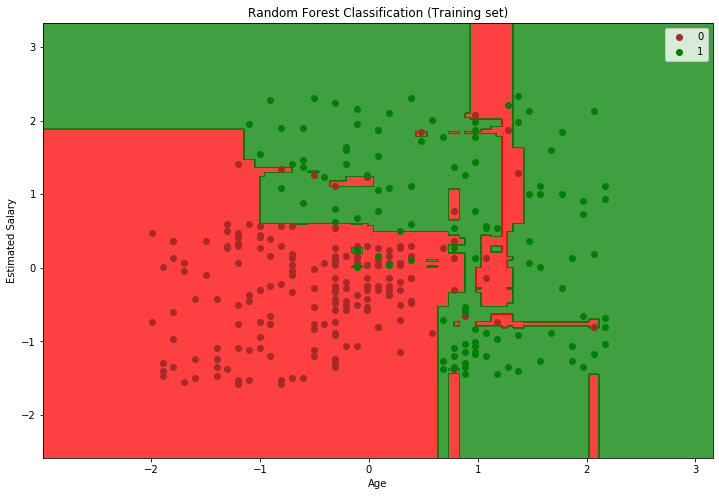

In [60]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,8))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('brown', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


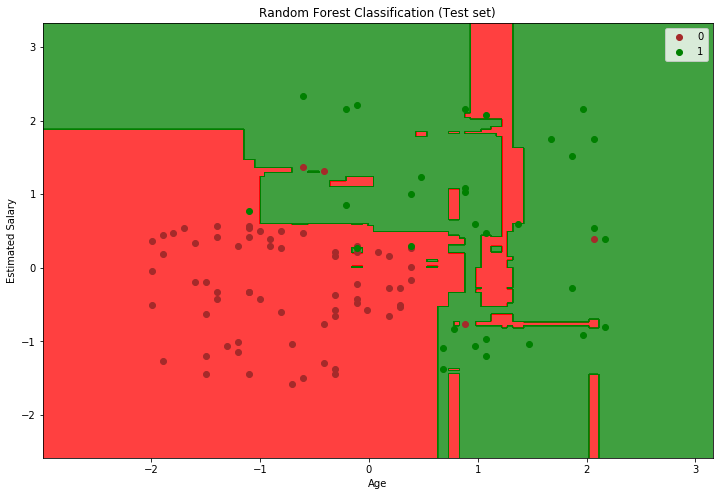

In [61]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,8))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('brown', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()